#### Imports

In [37]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Edge Detection

First step is to import the image

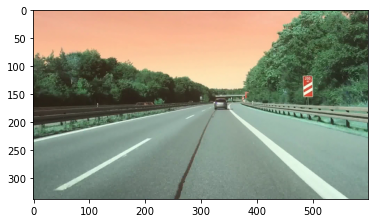

In [7]:

img = cv2.imread("images/test1.jpg")
plt.imshow(img)
plt.show()

##### Gray Scale the Image

This will increase the contrast and make edge detection easier

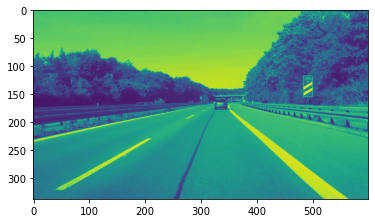

In [9]:
def grey_scale(image):
    return cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

grey = grey_scale(img)
plt.imshow(grey)
plt.show()

The next step is to apply a gausian blur to decrease the noise in the image when we look for edges

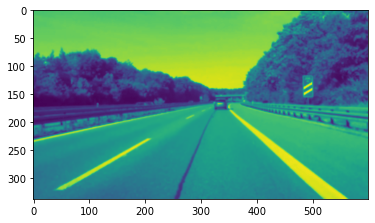

In [17]:
def gauss_blur(image):
    return cv2.GaussianBlur(image,(5,5),0)

blur = gauss_blur(grey)
plt.imshow(blur)
plt.show()

Now we can apply Canny Edge detection 

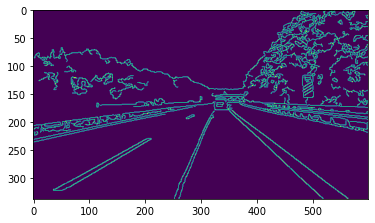

In [78]:
def canny_edge(image):
    return cv2.Canny(image,50,150)

edge = canny_edge(blur)
plt.imshow(edge)
plt.show()

We can now clearly see the edges, we need to isolate them so we can better use them. 

To do this we will define a region of intrest in the shape of a triangle from the image to the halfway point of the image

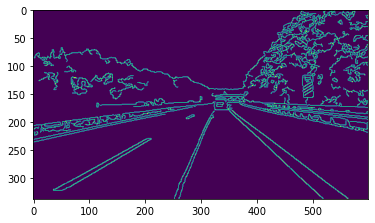

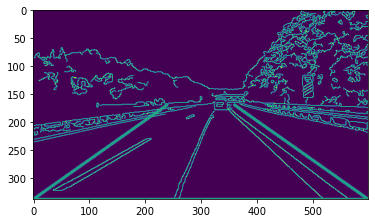

In [85]:
def roi(image):
    roi_image = image.copy()
    height, width = image.shape
    roi_points = np.float32([
      (int(width*0.6),int(height*0.5)), # Top-left corner
      (int(width*1.0), int(height*1.0)), # Bottom-left corner			
      (int(width*0.0),int(height*1.0)), # Bottom-right corner
      (int(width*0.4),int(height*0.5)) # Top-right corner
    ])
    return cv2.polylines(roi_image, np.int32([roi_points]), False, (147,20,255), 3)
plt.imshow(edge)
plt.show()
roi = roi(edge)
plt.imshow(roi)
plt.show()